<a href="https://colab.research.google.com/github/danielavela0227/AI_Agu-Dec-2024_BI_2002444/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniela Lizeth Vela Carrillo 2002444

Biomedical Engineering - AI


**Assignment 4.- Linear regression.**
The student will generate a linear regression model in Google Colab using the Python programming language. This model will predict the price of a house taking into account the medium income of the zone.


Step 1. Load libraries.

First, we need to import the necessary libraries for our linear regression model. Where what I added was the sklearn.metrics, which is used to split datasets into training and test sets, as well as to perform cross-validations. And sklearn.model_selection as it provides metrics such as mean squared error and accuracy, which are used to measure the quality of a model's predictions.

In [66]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.datasets import fetch_california_housing
import sklearn.metrics
import sklearn.model_selection
#import sys

Step 2. Load data.

The dataset is in the library scikit-learn. You can import it with the following commands:

In [67]:
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['Price'] = california.target
df #I used this command to visualize the dataframe of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Step 3. Data Preprocessing

The regression model will try to learn the relationship between the median income in the area (X) and the price of houses (y) in order to make predictions about new data.

In [68]:
# Select the independent variable
X = df[['MedInc']] # MedInc (Average income in the area)
y = df['Price']
# Split the train and testing data into sets (80% / 20%)
train_data, test_data, train_labels, test_labels = sklearn.model_selection.train_test_split(X, y)

Step 4. Model selection and training.

We select the linear regression model and we train the model with the preprocess data.

In [69]:
#Select linear regression model
model= sklearn.linear_model.LinearRegression()

# Train Model
model.fit(X, y)

LinearRegression()

Step 5. Model testing.

We test the model using the model.predict()  and obtain the predicted data generated by our linear regression model.

And mse = mean_squared_error(y_test, y_pred) is a scikit-learn function that calculates the mean squared error between the actual values and the values predicted by the model.

In [70]:
#Make predictions with the test data
y_pred = model.predict(test_data)
print(y_pred)

# Calculate mean square error (MSE)
mean_squared_error = sklearn.metrics.mean_squared_error(test_labels, y_pred)
#Show the MSE
print(f"Mean Squared Error (MSE): {mse}")

[2.00943199 2.3933085  4.99108878 ... 1.82269707 2.82219698 1.29325259]
Mean Squared Error (MSE): 0.6923491037408945


Display the results graphically

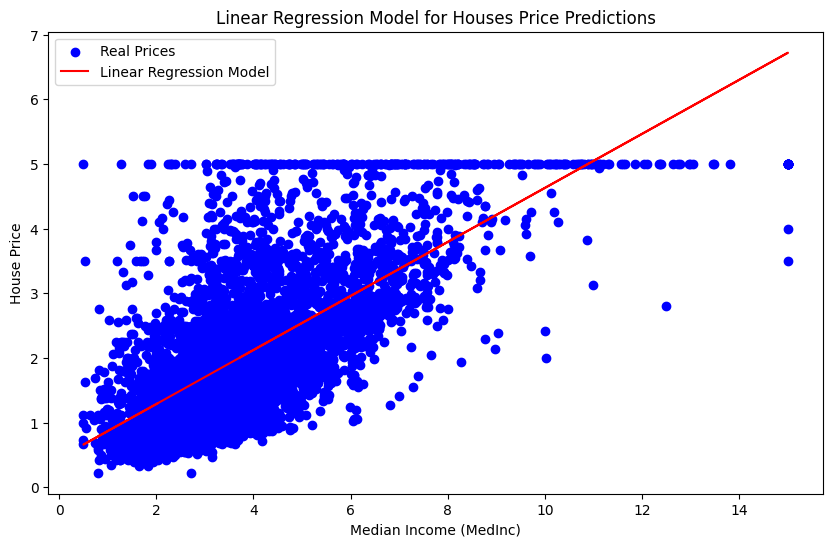

In [71]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(test_data['MedInc'], test_labels, color='blue', label='Real Prices')
plt.plot(test_data['MedInc'], y_pred, color='red', label='Linear Regression Model')
plt.title('Linear Regression Model for Houses Price Predictions')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price')
plt.legend()
plt.show()